In [10]:
## Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os

## Source ECDMS

In [11]:
## Source: http://www.ecdms.energy.ca.gov
filename = "ElectricityByUtility.csv"
filepath = os.path.join("data",filename)

ecdmsdf = pd.read_csv(filepath)
ecdmsdf.head()

,Utility Type,Utility Name,Year,Ag & Water Pump,Commercial Building,Commercial Other,Industry,Mining & Construction,Residential,Streetlight,Total Usage
0,Investor owned utility,Avista Energy,1990,0.000000,14.310562,0.088855,0.077131,0.01847,8.875343,0.000000,23.370361
1,Investor owned utility,Bear Valley Electric Service,1990,0.075805,34.275928,3.007874,0.000000,0.00000,52.580684,0.226513,90.166804
2,Investor owned utility,Bear Valley Electric Service,1991,0.000000,15.863337,2.414612,0.000000,0.00000,51.900996,0.273375,70.452320
3,Investor owned utility,Bear Valley Electric Service,1992,0.000000,42.370707,7.438678,0.000000,0.00000,54.834000,0.702615,105.346000
4,Investor owned utility,Bear Valley Electric Service,1993,0.000000,41.686458,9.570772,0.000000,0.00000,54.369000,0.607769,106.233999


Number of total rows available

In [12]:
len(ecdmsdf)

1561

Number of rows per year

In [13]:
yearly_data = ecdmsdf['Year'].value_counts()

In [14]:
yearly_data.plot(kind="bar")

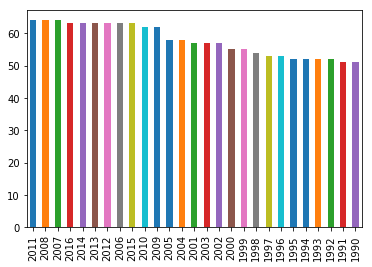

In [15]:
plt.show()

In [16]:
yearly_data

2011    64
2008    64
2007    64
2016    63
2014    63
2013    63
2012    63
2006    63
2015    63
2010    62
2009    62
2005    58
2004    58
2001    57
2003    57
2002    57
2000    55
1999    55
1998    54
1997    53
1996    53
1995    52
1994    52
1993    52
1992    52
1991    51
1990    51
Name: Year, dtype: int64

## Source EIA

In [17]:
## Source: https://www.eia.gov/totalenergy/data/browser/?tbl=T10.05#/?f=M
filename = "MER_T10_05.csv"
filepath = os.path.join("data",filename)

eiadf = pd.read_csv(filepath)
eiadf.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,SOT8BUS,194913,Not Available,1,Distributed Solar Energy Consumption for Heat:...,Trillion Btu
1,SOT8BUS,195013,Not Available,1,Distributed Solar Energy Consumption for Heat:...,Trillion Btu
2,SOT8BUS,195113,Not Available,1,Distributed Solar Energy Consumption for Heat:...,Trillion Btu
3,SOT8BUS,195213,Not Available,1,Distributed Solar Energy Consumption for Heat:...,Trillion Btu
4,SOT8BUS,195313,Not Available,1,Distributed Solar Energy Consumption for Heat:...,Trillion Btu


In [18]:
len(eiadf)

6732

In [20]:
values = eiadf[['Value', 'YYYYMM']]
values = values.loc[values['Value'] != "Not Available"]
len(values)

4375

In [27]:
values.dtypes

Value     object
YYYYMM     int64
dtype: object

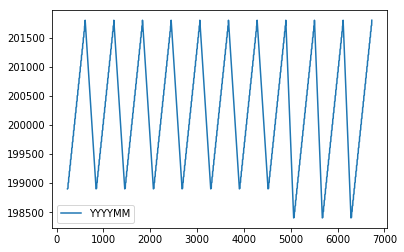

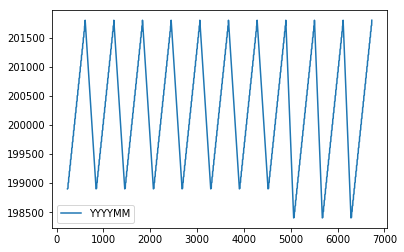

In [36]:
#remove values totals respresented with YYYY13
values.plot()
plt.show()

In [3]:
## Source: https://www.eia.gov/totalenergy/data/browser/?tbl=T10.01#/?f=M
filename = "MER_T10_01.csv"
filepath = os.path.join("data",filename)

eiadf1 = pd.read_csv(filepath)
eiadf1.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,BFPRBUS,194913,Not Available,1,Biofuels Production,Trillion Btu
1,BFPRBUS,195013,Not Available,1,Biofuels Production,Trillion Btu
2,BFPRBUS,195113,Not Available,1,Biofuels Production,Trillion Btu
3,BFPRBUS,195213,Not Available,1,Biofuels Production,Trillion Btu
4,BFPRBUS,195313,Not Available,1,Biofuels Production,Trillion Btu


In [7]:
print(len(eiadf1))
values1 = eiadf1[['Value', 'YYYYMM', 'Description']]
values1 = values1.loc[values1['Description'] == "Solar Energy Consumption"]


7344


In [8]:
len(values1)

612

In [9]:
values1

,Value,YYYYMM,Description
3060,Not Available,194913,Solar Energy Consumption
3061,Not Available,195013,Solar Energy Consumption
3062,Not Available,195113,Solar Energy Consumption
3063,Not Available,195213,Solar Energy Consumption
3064,Not Available,195313,Solar Energy Consumption
3065,Not Available,195413,Solar Energy Consumption
3066,Not Available,195513,Solar Energy Consumption
3067,Not Available,195613,Solar Energy Consumption
3068,Not Available,195713,Solar Energy Consumption
3069,Not Available,195813,Solar Energy Consumption
